In [1]:
import numpy as np
import pandas as pd
from random import choice
from matplotlib import pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

In [2]:
import time
import warnings

from copy import deepcopy

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from itertools import cycle, islice

import timeit

In [3]:
# distance calculator

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [4]:
n_samples=1000

(array([[ -8.43157429,  -3.27859587],
       [  7.3435412 ,  -6.50409389],
       [-11.22211103,  -0.48031088],
       ...,
       [  7.77656922,  -5.63147418],
       [ -5.57254889,   0.93012253],
       [ -8.97958005,  -2.29273386]]), array([1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1,
       2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 1, 0, 1, 1, 0,

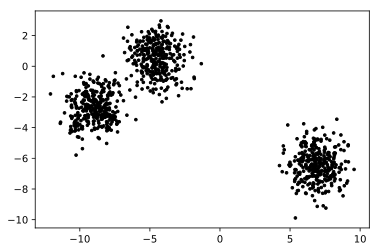

In [22]:
data = datasets.make_blobs(n_samples=n_samples, random_state=15)
print (data)

points_blobs=blobs[0]

f1=points_blobs[0:((n_samples)), 0]
f2=points_blobs[0:((n_samples)), 1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))
print (X)
xAchsemax= f1.max()
xAchsemin = f1.min()
yAchsemax = f2.max()
yAchsemin = f2.min()

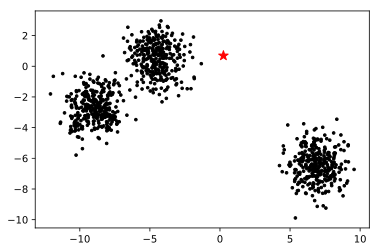

In [29]:
# distance calculator

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

C = np.random.random((1,2))

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(C[:, 0], C[:, 1],marker='*',c='red',s=100)
    
clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old) # Konvergenz


data_2 = pd.DataFrame(X)
data_long = data_2.reset_index().melt(id_vars="index") #Index zur Tabelle hinzufügen
a = np.array(data_long)
index =a[0:n_samples,0] #Index definieren
Liste =[] #Liste für kleinsten Distanzen


In [30]:
#Anzahl der Cluster festlegen
k=3
n=0

while n<=k:
    n=n+1
    Liste =[]
    for i in range (len(X)):
        diff=X[i]-C
        dist = np.linalg.norm(diff,axis=1) # Distance berechnen
        min_dist= np.min(dist)
        Liste.append(min_dist)
    s= np.array(Liste)
    dist_2 = (s)**2
    prob = (dist_2)/ sum (dist_2) #p-Verteilung
    z=np.random.choice(index, p=prob) #Index des neuen Clusters in Tabelle
    c_neu=X[z] #Datenpunkt mit Index z als neues Center festlegen
    cl = np.ndarray.tolist(C) #alter arry in liste umwandeln damit ein Wert hinzugefügt werden kann
    c_neul = np.ndarray.tolist (c_neu) #neuer Wert in Liste umgewandelt
    cl.append (c_neul) # Center-Liste mit neuen Centerdaten erweitern
    C = np.array(cl) #Liste wieder in Array umwandeln

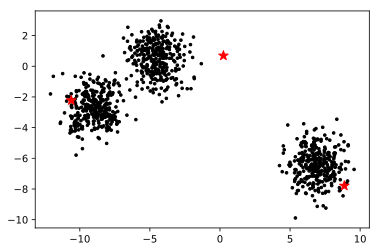

In [31]:
cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)

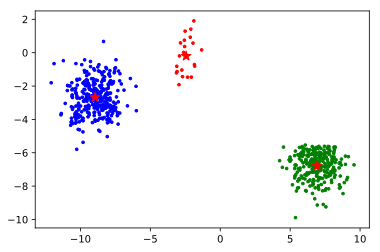

In [40]:
while error.all() != 0:
    for i in range(len(X)):
            diff2=X[i]-C
            distances = np.linalg.norm(diff2,axis=1) # Distance berechnen
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    diff3 = C-C_old
    dist3 = np.linalg.norm(diff3,axis=1) # Distance berechnen
    error = dist3
        

   
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
plt.scatter(cx1,cy1,marker='*',c='red',s=100)